In [10]:
import pandas as pd
import matplotlib.pyplot as pp
from pathlib import Path

In [11]:
file_path = Path('../generated_data/')
file_293 = file_path / 'mapped_control.csv'
file_mito = file_path / 'mapped_mito.csv'

In [12]:
con = pd.read_csv(file_293)
con.rename(columns = {'Var1': 'reaction', 'Var2': 'value'}, inplace=True)
con.set_index('reaction', inplace=True)
con.head()

,value
reaction,
OF_ATP_MitoCore,NaN
OF_HEME_MitoCore,NaN
OF_LIPID_MitoCore,NaN
OF_PROTEIN_MitoCore,NaN
HEX1,1.247


In [13]:
mito = pd.read_csv(file_mito)
mito.rename(columns = {'Var1': 'reaction', 'Var2': 'value'}, inplace=True)
mito.set_index('reaction', inplace=True)
mito.head()

,value
reaction,
OF_ATP_MitoCore,NaN
OF_HEME_MitoCore,NaN
OF_LIPID_MitoCore,NaN
OF_PROTEIN_MitoCore,NaN
HEX1,1.318333


In [14]:
con_nans = sum(con.isna().values)[0]
con_mapped = len(con.dropna())

In [15]:
mito_nans = sum(mito.isna().values)[0]
mito_mapped = len(mito.dropna())

In [16]:
rxns = pd.read_csv('../external_data//mitocore/rxns_machine_readable.csv').dropna(subset=['Gene Name'])
rxns = rxns[rxns['Gene Name'] != 'Unknown']
rxns_with_gene = len(rxns)

In [17]:
print(len(con) == len(mito))
print(mito_nans == con_nans)
print(mito_mapped == con_mapped)

True
True
True


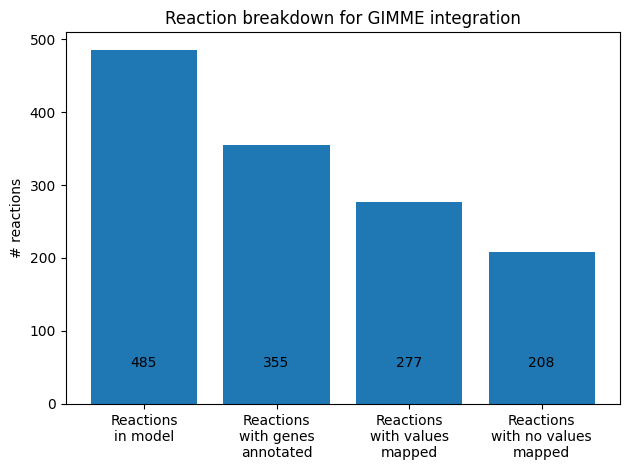

In [18]:
fig_path = Path('../images/supplements/')
plot = [len(mito), rxns_with_gene, mito_mapped, mito_nans]
labels = [
    'Reactions\nin model', 
    'Reactions\nwith genes\nannotated', 
    'Reactions\nwith values\nmapped',
    'Reactions\nwith no values\nmapped'
]
pp.bar(height=plot, x=labels)
pp.ylabel('# reactions')
pp.title("Reaction breakdown for GIMME integration")

pp.annotate(str(len(mito)), (-.1, 50))
pp.annotate(str(rxns_with_gene), (1.-.1, 50))
pp.annotate(str(mito_mapped), (2.-.1, 50))
pp.annotate(str(mito_nans), (3.-.1, 50))

pp.tight_layout()

ax = pp.gca()
fig = ax.get_figure()